## NACA0012 Testcase

![naca](http://turbmodels.larc.nasa.gov/NACA0012_grids/grid_bcs.jpg)

#### References

<a href=http://turbmodels.larc.nasa.gov/naca0012_val.html>NASA</a><br/>


In [1]:
# Names of cases
case_dict = { 'n0012_897_a0p0' : { 'alpha' : 0.0,
                                   'cp max': 1.2,
                                   'cp min' : -0.6,
                                   'cf max' : 0.01,
                                   'cf min' : 0.0,
                                   'cp expt' : 'CP_Gregory_expdata_a0p0.csv',
                                   'cp comp' : 'n0012cp_cfl3d_sstv_a0p0.dat',
                                   'cf comp' : 'n0012cf_cfl3d_sstv_a0p0.dat',
                                   'cl comp' : 0.0,
                                   'cd comp' : 0.00828,
                                  },
             'n0012_897_a10p0' : { 'alpha' : 10.0,
                                   'cp max': 2.0,
                                   'cp min' : -6.0,
                                   'cf max' : 0.04,
                                   'cf min' : -0.005,
                                   'cp expt' : 'CP_Gregory_expdata_a10p0.csv',
                                   'cp comp' : 'n0012cp_cfl3d_sstv_a10p0.dat',
                                   'cf comp' : 'n0012cf_cfl3d_sstv_a10p0.dat',
                                   'cl comp' : 1.0778,
                                   'cd comp' : 0.01245,
                                  },            
             'n0012_897_a15p0' : { 'alpha' : 15.0,
                                   'cp max': 2.0,
                                   'cp min' : -12.0,
                                   'cf max' : 0.06,
                                   'cf min' : -0.005,
                                   'cp expt' : 'CP_Gregory_expdata_a15p0.csv',
                                   'cp comp' : 'n0012cp_cfl3d_sstv_a15p0.dat',
                                   'cf comp' : 'n0012cf_cfl3d_sstv_a15p0.dat',
                                   'cl comp' : 1.5060,
                                   'cd comp' : 0.02224,
                                  },
}

## Define Data Location

In [2]:
remote_data = True
remote_server_auto = True

# zeno_orange = '#E48B25'
zeno_orange = '#E58B1C'
zeno_grey = '#5D5858'

data_dir='/gpfs/thirdparty/zenotech/home/dstandingford/VALIDATION/NACA0012'
data_host='dstandingford@vis03'
paraview_cmd='mpiexec /gpfs/cfms/apps/zCFD/bin/pvserver'

if not remote_server_auto:
    paraview_cmd=None

if not remote_data:
    data_host='localhost'
    paraview_cmd=None

### zCFD Validation and Regression

In [3]:
validate = True
regression = True

tol_cl = 0.01
tol_cd = 0.0002

if (validate):
    valid = True
    valid_lower_a0p0_cl  = 0.0 - tol_cl
    valid_upper_a0p0_cl  = 0.0 + tol_cl
    valid_lower_a0p0_cd  = 0.82811E-02 - tol_cd
    valid_upper_a0p0_cd  = 0.82811E-02 + tol_cd
    valid_lower_a10p0_cl = 0.10778E+01 - tol_cl
    valid_upper_a10p0_cl = 0.10778E+01 + tol_cl
    valid_lower_a10p0_cd = 0.12454E-01 - tol_cd
    valid_upper_a10p0_cd = 0.12454E-01 + tol_cd
    valid_lower_a15p0_cl = 0.15060E+01 - tol_cl
    valid_upper_a15p0_cl = 0.15060E+01 + tol_cl
    valid_lower_a15p0_cd = 0.22237E-01 - tol_cd
    valid_upper_a15p0_cd = 0.22237E-01 + tol_cd
    print 'VALIDATING NACA0012 CASE'
    
if (regression):
    print 'REGRESSION NACA0012 CASE'


VALIDATING NACA0012 CASE
REGRESSION NACA0012 CASE


### Initialise Environment

In [4]:
%pylab inline
from paraview.simple import *
paraview.simple._DisableFirstRenderCameraReset()
import math

Populating the interactive namespace from numpy and matplotlib
paraview version 4.2.0-77-g31a1d2a


### Remote Data Connection
This starts paraview server on remote host and connects

In [5]:
from zutil.post import pvserver_connect
if remote_data:
    pvserver_connect(data_host=data_host,data_dir=data_dir,paraview_cmd=paraview_cmd)

Testing passwordless ssh access
-> Passed
Attempting to find unused port
[dstandingford@vis03] Executing task 'run_uname'
[dstandingford@vis03] Executing task 'port_test'
Selected Port: 12001
Starting pvserver connect
[dstandingford@vis03] Executing task 'port_test'
Starting pvserver process
[dstandingford@vis03] Executing task 'pvserver'
[dstandingford@vis03] run: /bin/bash -l -c "cd /gpfs/thirdparty/zenotech/home/dstandingford/VALIDATION/NACA0012 && sleep 2;mpiexec /gpfs/cfms/apps/zCFD/bin/pvserver -rc --client-host=localhost -sp=12001"
[dstandingford@vis03] out: 
[dstandingford@vis03] out: 		   _____ ______ __  __  _____ 
[dstandingford@vis03] out: 		  / ____|  ____|  \/  |/ ____|
[dstandingford@vis03] out: 		 | |    | |__  | \  / | (___  
[dstandingford@vis03] out: 		 | |    |  __| | |\/| |\___ \ 
[dstandingford@vis03] out: 		 | |____| |    | |  | |____) |
[dstandingford@vis03] out: 		  \_____|_|    |_|  |_|_____/ 
[dstandingford@vis03] out: 
[dstandingford@vis03] out: ++++++++++++

### Plot forces functions

In [6]:
from zutil.post import cp_profile
from zutil.post import cf_profile
from zutil.post import get_fw_csv_data
from zutil.post import get_case_root, get_case_report
from zutil.post import get_csv_data

def plot_theory(ax, filename):
    df = get_csv_data(filename)
    ax.scatter(df[0], df[1], color='grey', label='Gregory Re=3m free transition')    

def get_cl_alpha(filename):
    return get_fw_csv_data(filename,widths=[16,16])
def cp_plot(data,pts,**kwargs):
    ax = kwargs['axis']
    ax.plot(data.GetPointData()['chord'], data.GetPointData()['cp'], color='b', label=kwargs['chart_label'])

def cf_plot(data,pts,**kwargs):
    ax = kwargs['axis']
    ax.plot(data.GetPointData()['chord'], data.GetPointData()['cfmag'], color='b', label=kwargs['chart_label']) 

def plot_cp_profile(ax,label,file_root,alpha,beta):
    wall = PVDReader( FileName=file_root+'_wall.pvd' )
    chart_label = label + '$\mathbf{Re}$' + ' = 6m (fully turbulent)'
    force_data = cp_profile(wall,[0.0,1.0,0.0],[0.0, -0.5, 0.0],
                            axis=ax,alpha=alpha,beta=beta,func=cp_plot,chart_label=chart_label)
    pforce = force_data['pressure force']
    fforce = force_data['friction force']
    ax.set_title(r'NACA0012 $\mathbf{\alpha='+ ('%.1f \/' % alpha) 
                 + ('C_l=%.4f\/ C_d=%.4f}$ \n' % (pforce[2]+fforce[2],pforce[0]+fforce[0])),
                 fontsize=20, fontweight='normal', color = zeno_grey)
    return (pforce,fforce)

def plot_cf_profile(ax,label,file_root,alpha,beta):
    wall = PVDReader( FileName=file_root+'_wall.pvd' )
    chart_label = label + '$\mathbf{Re}$' + ' = 6m (fully turbulent)'
    force_data = cf_profile(wall,[0.0,1.0,0.0],[0.0, -0.5, 0.0],
                            axis=ax,alpha=alpha,beta=beta,func=cf_plot,chart_label=chart_label)
    pforce = force_data['pressure force']
    fforce = force_data['friction force']
    ax.set_title(r'NACA0012 $\mathbf{\alpha='+ ('%.1f \/' % alpha) 
                 + ('C_l=%.4f\/ C_d=%.4f}$ \n' % (pforce[2]+fforce[2],pforce[0]+fforce[0])),
                 fontsize=20, fontweight='normal', color = zeno_grey)
    return (pforce,fforce)

## Generate the plots

/Users/David/Documents/zPost/python/zutil/post.py:768: DeprecationWarning: With-statements now directly support multiple context managers
  with hide('output', 'running', 'warnings'), settings(warn_only=True):
/Applications/paraview.app/Contents/Python/paraview/vtk/numpy_interface/dataset_adapter.py:126: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if array == None:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/David/Documents/zPost/python/zutil/post.py:768: DeprecationWarning: With-statements now directly support multiple context managers
  with hide('output', 'running', 'warnings'), settings(warn_only=True):


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ERROR: In /scratch/jappa/v0.2.0/vagrant-zcfd/scripts/BUILD/zCFD-icc-sse_build/paraview/src/paraview/VTK/IO/XML/vtkXMLReader.cxx, line 233
[dstandingford@vis03] out: vtkPVDReader (0x3d84840): Error opening file n0012_897_a15p0_P12_OUTPUT/n0012_897_a15p0_wall.pvd
[dstandingford@vis03] out: 
[dstandingford@vis03] out: ERROR: In /scratch/jappa/v0.2.0/vagrant-zcfd/scripts/BUILD/zCFD-icc-sse_build/paraview/src/paraview/ParaViewCore/VTKExtensions/Default/vtkPVDReader.cxx, line 147
[dstandingford@vis03] out: vtkPVDReader (0x3d84840): Could not read file information
[dstandingford@vis03] out: 
[dstandingford@vis03] out: ERROR: In /scratch/jappa/v0.2.0/vagrant-zcfd/scripts/BUILD/zCFD-icc-sse_build/paraview/src/paraview/VTK/Common/ExecutionModel/vtkExecutive.cxx, line 783
[dstandingford@vis03] out: vtkPVCompositeDataPipeline (0x3e2db60): Algorithm vtkPVDReader(0x3d84840) returned failure for request: vtkInformation (0x3dacc20)
[dstandingford@vis03] out:   Debug: Off
[dstandingford@vis03] out:   M

/Users/David/Documents/zPost/python/zutil/post.py:768: DeprecationWarning: With-statements now directly support multiple context managers
  with hide('output', 'running', 'warnings'), settings(warn_only=True):


AttributeError: 'NoneType' object has no attribute 'NewInstance'

[dstandingford@vis03] out:   Registered Events: (none)
[dstandingford@vis03] out:   Request: REQUEST_DATA_OBJECT
[dstandingford@vis03] out:   FORWARD_DIRECTION: 0
[dstandingford@vis03] out:   FROM_OUTPUT_PORT: 0
[dstandingford@vis03] out:   ALGORITHM_AFTER_FORWARD: 1
[dstandingford@vis03] out: 
[dstandingford@vis03] out: 
[dstandingford@vis03] out: 
[dstandingford@vis03] out: ERROR: In /scratch/jappa/v0.2.0/vagrant-zcfd/scripts/BUILD/zCFD-icc-sse_build/paraview/src/paraview/VTK/IO/XML/vtkXMLReader.cxx, line 233
[dstandingford@vis03] out: vtkPVDReader (0x3d84840): Error opening file n0012_897_a15p0_P12_OUTPUT/n0012_897_a15p0_wall.pvd
[dstandingford@vis03] out: 
[dstandingford@vis03] out: ERROR: In /scratch/jappa/v0.2.0/vagrant-zcfd/scripts/BUILD/zCFD-icc-sse_build/paraview/src/paraview/ParaViewCore/VTKExtensions/Default/vtkPVDReader.cxx, line 147
[dstandingford@vis03] out: vtkPVDReader (0x3d84840): Could not read file information
[dstandingford@vis03] out: 
[dstandingford@vis03] out: ER

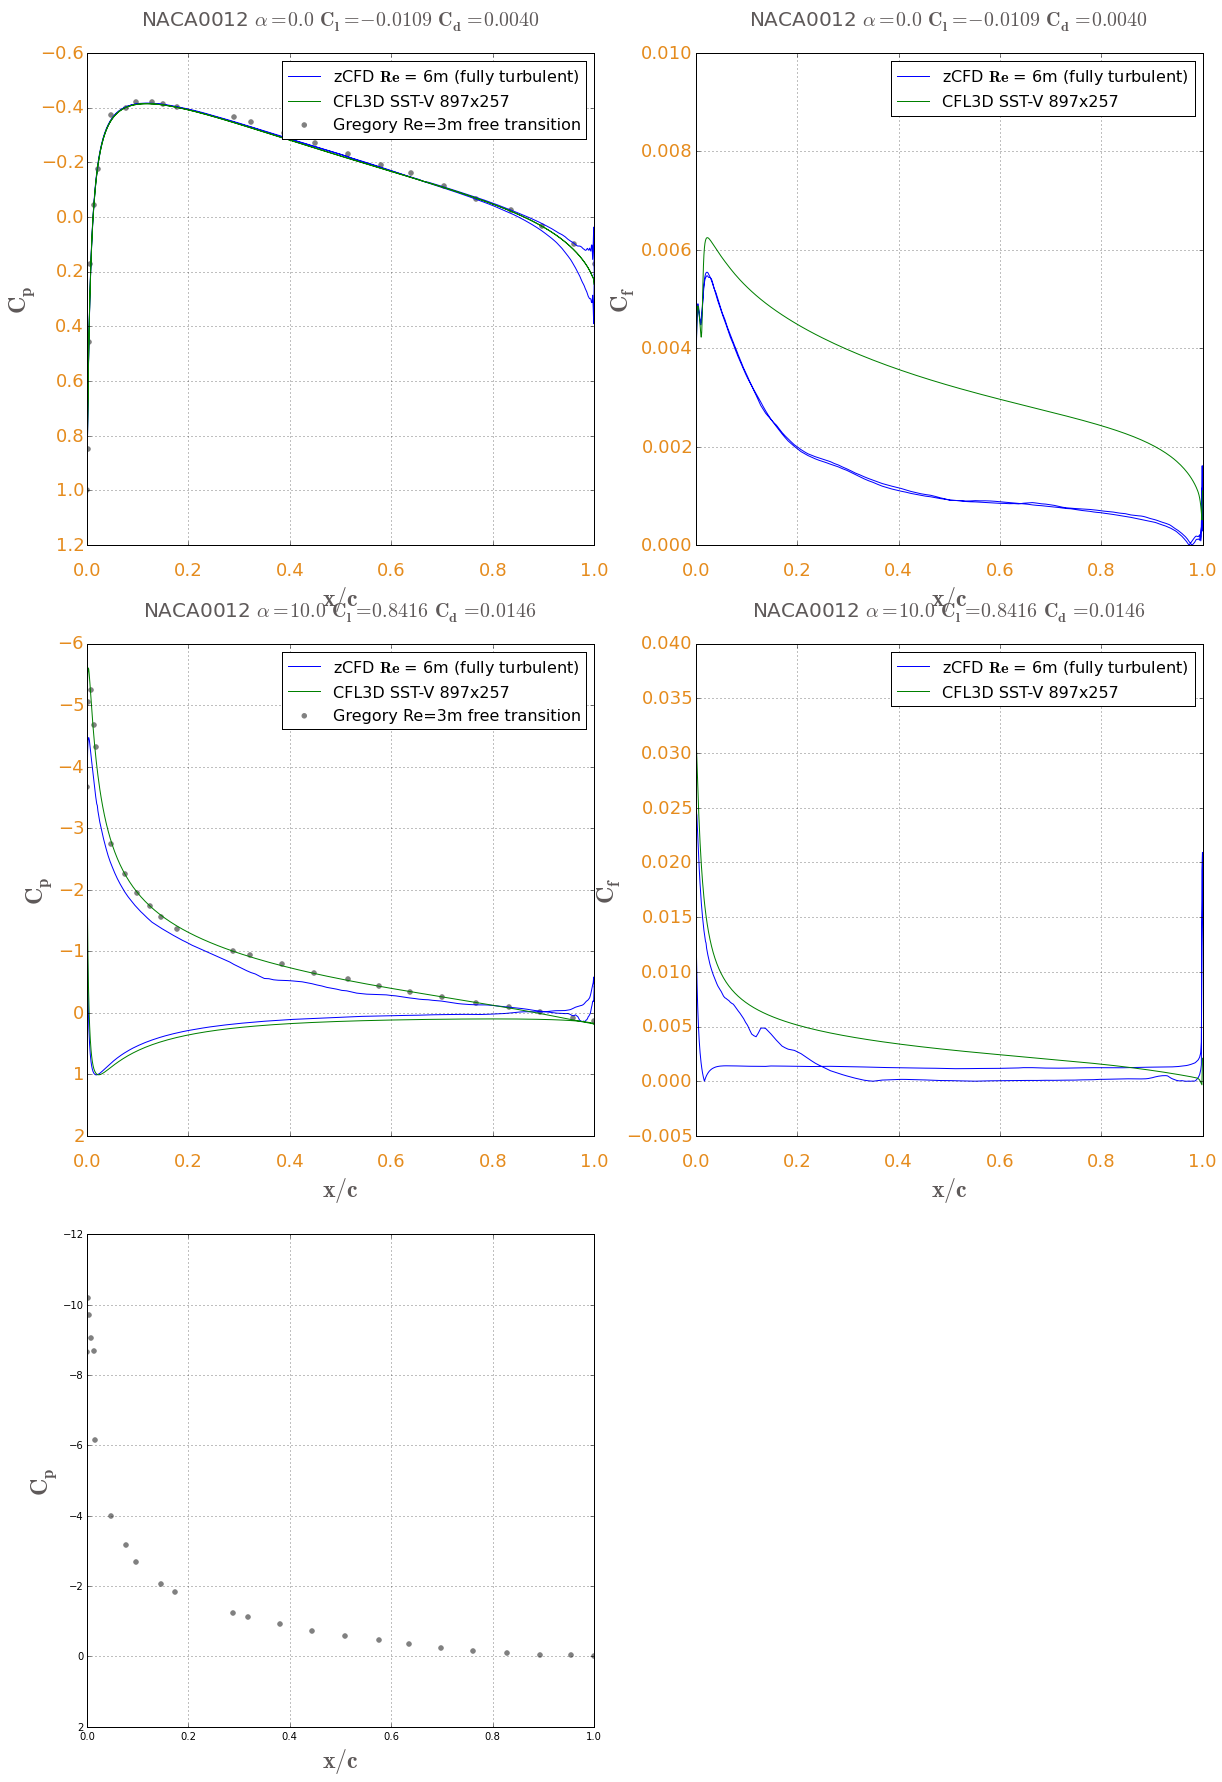

[dstandingford@vis03] out: vtkPVDReader (0x3d84840): Error opening file n0012_897_a15p0_P12_OUTPUT/n0012_897_a15p0_wall.pvd
[dstandingford@vis03] out: 
[dstandingford@vis03] out: ERROR: In /scratch/jappa/v0.2.0/vagrant-zcfd/scripts/BUILD/zCFD-icc-sse_build/paraview/src/paraview/ParaViewCore/VTKExtensions/Default/vtkPVDReader.cxx, line 147
[dstandingford@vis03] out: vtkPVDReader (0x3d84840): Could not read file information
[dstandingford@vis03] out: 
[dstandingford@vis03] out: ERROR: In /scratch/jappa/v0.2.0/vagrant-zcfd/scripts/BUILD/zCFD-icc-sse_build/paraview/src/paraview/VTK/Common/ExecutionModel/vtkExecutive.cxx, line 783
[dstandingford@vis03] out: vtkPVCompositeDataPipeline (0x3e2db60): Algorithm vtkPVDReader(0x3d84840) returned failure for request: vtkInformation (0x3e17520)
[dstandingford@vis03] out:   Debug: Off
[dstandingford@vis03] out:   Modified Time: 636912
[dstandingford@vis03] out:   Reference Count: 1
[dstandingford@vis03] out:   Registered Events: (none)
[dstandingford

In [7]:
from zutil.post import get_num_procs
import mpld3
from zutil.post import ProgressBar
pbar = ProgressBar()

fig = figure(figsize=(20, 30),dpi=150, facecolor='w', edgecolor= zeno_orange)
plot = 1
angle = []
cl = []
cd = []

# Analysis constants
alpha = 0.0
beta  = 0.0
reference_area = 1.0

for case in case_dict:
    case_name = case
    case_var = case_dict[case]
    
    num_procs = get_num_procs(case_name,data_host=data_host,data_dir=data_dir)
    
    ax = fig.add_subplot(len(case_dict),2,plot)
    ax.grid(True)
    ax.set_xlabel('$\mathbf{x/c}$', fontsize=24, fontweight='bold', color = zeno_grey)
    ax.set_ylabel('$\mathbf{C_p}$', fontsize=24, fontweight='bold', color = zeno_grey)
    ax.axis([0,1,case_var['cp max'],case_var['cp min']])
    plot_theory(ax,'data/'+case_var['cp expt']);
    alpha = case_var['alpha']
    f = plot_cp_profile(ax,'zCFD ',get_case_root(case_name,str(num_procs)),alpha,beta)
    data = get_cl_alpha('data/'+case_var['cp comp'])
    ax.plot(data[0],data[1],color='g',label='CFL3D SST-V 897x257')
    angle.append(alpha)
    cl.append(f[0][2]+f[1][2])
    cd.append(f[0][0]+f[1][0])
    
    legend = ax.legend(loc='upper right', scatterpoints=1, numpoints=1, shadow=False, fontsize=16)
    legend.get_frame().set_facecolor('white')
    ax.tick_params(axis='x', pad=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
        tick.label.set_fontweight('normal') 
        tick.label.set_color(zeno_orange)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
        tick.label.set_fontweight('normal') 
        tick.label.set_color(zeno_orange)    

    pbar+=5
    plot+=1

    ax = fig.add_subplot(len(case_dict),2,plot)
    ax.grid(True)
    ax.set_xlabel('$\mathbf{x/c}$', fontsize=24, fontweight='bold', color = zeno_grey)
    ax.set_ylabel('$\mathbf{C_f}$', fontsize=24, fontweight='bold', color = zeno_grey)
    ax.axis([0,1,case_var['cf min'],case_var['cf max']])
    f = plot_cf_profile(ax,'zCFD ',get_case_root(case_name,str(num_procs)),alpha,beta)
    data = get_fw_csv_data('data/'+case_var['cf comp'],widths=[27,27])
    ax.plot(data[0],data[1],color='g',label='CFL3D SST-V 897x257')
    
    legend = ax.legend(loc='upper right', scatterpoints=1, numpoints=1, shadow=False, fontsize=16)
    legend.get_frame().set_facecolor('white')
    ax.tick_params(axis='x', pad=16)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
        tick.label.set_fontweight('normal') 
        tick.label.set_color(zeno_orange)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
        tick.label.set_fontweight('normal') 
        tick.label.set_color(zeno_orange)    

    pbar+=5
    plot+=1    
    
fig.subplots_adjust(hspace=0.3) 
fig.subplots_adjust(wspace=0.3) 
fig.savefig("images/naca0012_cp_profile.png")
pbar.complete()
show()
from IPython.display import FileLink, display 
display(FileLink('images/naca0012_cp_profile.png'))


## Compare $C_l$ versus $C_d$ curve

In [ ]:
# Read Ladson data
from zutil.post import get_fw_csv_data
data = get_fw_csv_data('data/CLCD_Ladson_expdata.csv',widths=[7,7,7])
cl_comp = []
cd_comp = []
for case in case_dict:
    case_var = case_dict[case]
    cl_comp.append(case_var['cl comp'])
    cd_comp.append(case_var['cd comp'])

fig = figure(figsize=(22, 10), dpi=150, facecolor='w', edgecolor=zeno_orange)
fig.suptitle(r'NACA0012 $\mathbf{C_L}$ vs $\mathbf{C_D}$', 
             fontsize=24, fontweight='normal', color = zeno_grey)

ax = fig.add_subplot(1,2,1)
ax.grid(True)
ax.set_xlabel(r'$\alpha$ [degrees]', fontsize=24, fontweight='normal', color = zeno_grey)
ax.set_ylabel(r'$\mathbf{C_l}$', fontsize=24, fontweight='normal', color = zeno_grey)
ax.axis([-1.0,20,-0.2,1.8])
ax.scatter(data[0], data[1], color='green', marker="o", s=100, 
           label='Ladson ' + '$\mathbf{Re}$' + ' = 6m (fixed transition)')  
ax.scatter(angle,cl,color=zeno_orange, marker="^", s=149,
           label='zCFD ' + '$\mathbf{Re}$' +  ' = 6m (fully turbulent)')
ax.scatter(angle,cl_comp,color='black',marker="x",s=169,
           label='CFL3D SST-V 897x257')
legend = ax.legend(loc='lower right', scatterpoints=1, numpoints=1, shadow=False, fontsize=20)
legend.get_frame().set_facecolor('white')
ax.tick_params(axis='x', pad=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
    tick.label.set_fontweight('normal') 
    tick.label.set_color(zeno_orange)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
    tick.label.set_fontweight('normal') 
    tick.label.set_color(zeno_orange)    

ax = fig.add_subplot(1,2,2)
ax.grid(True)
ax.set_xlabel(r'$\mathbf{C_l}$', fontsize=24, fontweight='normal', color = zeno_grey)
ax.set_ylabel(r'$\mathbf{C_d}$', fontsize=24, fontweight='normal', color = zeno_grey)
ax.axis([-0.1,2,0,0.03])
ax.scatter(data[1], data[2], color='green', marker = "o", s=100, 
           label='Ladson ' + '$\mathbf{Re}$' + ' = 6m (fixed transition)')  
ax.scatter(cl, cd, marker="^", s=149, color=zeno_orange, 
           label='zCFD ' + '$\mathbf{Re}$' +  ' = 6m (fully turbulent)')
ax.scatter(cl_comp, cd_comp, marker="x", s=169, color='black', label='CFL3D SST-V 897x257')
legend = ax.legend(loc='lower right', scatterpoints=1, numpoints=1, shadow=False, fontsize=20)
legend.get_frame().set_facecolor('white')
ax.tick_params(axis='x', pad=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
    tick.label.set_fontweight('normal') 
    tick.label.set_color(zeno_orange)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
    tick.label.set_fontweight('normal') 
    tick.label.set_color(zeno_orange)    

fig.subplots_adjust(wspace=0.3) 
fig.savefig("images/naca0012_clcd.png")
show()
from IPython.display import FileLink, display 
display(FileLink('images/naca0012_clcd.png'))

## Convergence History

In [ ]:
from zutil.post import residual_plot
for case in case_dict:
    residual_plot(get_case_report(case))
show()

## Check validation and regression

In [ ]:
def validate_data(name, value, valid_lower, valid_upper):
    if ((value < valid_lower) or (value > valid_upper)):
        print 'INVALID: ' + name + ' %.4f '%valid_lower + '%.4f '%value + ' %.4f'%valid_upper
        return False
    else:
        return True   
    
if (validate):
    valid = (validate_data('C_L[alpha=0.0]', cl[0], valid_lower_a0p0_cl, valid_upper_a0p0_cl)
             and validate_data('C_D[alpha=0.0]', cd[0], valid_lower_a0p0_cd, valid_upper_a0p0_cd)
             and validate_data('C_L[alpha=10.0]', cl[1], valid_lower_a10p0_cl, valid_upper_a10p0_cl)
             and validate_data('C_D[alpha=10.0]', cd[1], valid_lower_a10p0_cd, valid_upper_a10p0_cd)
             and validate_data('C_L[alpha=15.0]', cl[2], valid_lower_a15p0_cl, valid_upper_a15p0_cl)
             and validate_data('C_D[alpha=15.0]', cd[2], valid_lower_a15p0_cd, valid_upper_a15p0_cd))  
    if (valid):
        print 'VALIDATION = PASS :-)'
    else:
        print 'VALIDATION = FAIL :-('   

In [ ]:
if (regression):
    import pandas as pd
    pd.options.display.float_format = '{:,.6f}'.format
    print 'REGRESSION DATA'
    regress = {'version' : ['v-alpha'  , 'v-beta'  , 'CURRENT'], 
               'C_L[alpha=0.0]' : [2.217000, 2.217000, cl[0]], 
               'C_D[alpha=0.0]' : [0.497464, 0.498132, cd[0]],
               'C_L[alpha=10.0]': [0.024460, 0.024495, cl[1]],
               'C_D[alpha=10.0]': [0.014094, 0.014099, cd[1]],
               'C_L[alpha=15.0]': [0.010366, 0.010396, cl[2]], 
               'C_D[alpha=15.0]': [0.010366, 0.010396, cd[2]]}
    regression_table = pd.DataFrame(regress, columns=['version', 
                                                      'C_L[alpha=0.0]', 'C_D[alpha=0.0]',
                                                      'C_L[alpha=10.0]', 'C_D[alpha=10.0]',
                                                      'C_L[alpha=15.0]', 'C_D[alpha=15.0]'])
    print regression_table

## Cleaning up

In [ ]:
if remote_data:
    #print 'Disconnecting from remote paraview server connection'
    Disconnect()
    pass